In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

cols=['Date', 'Time', 'Open','High','Low','Last']
dfm = pd.read_csv('data/eum.csv',skipinitialspace=True, usecols=cols)
dfw = pd.read_csv('data/euw.csv',skipinitialspace=True, usecols=cols)
dfd = pd.read_csv('data/eud.csv',skipinitialspace=True, usecols=cols)
df4hr = pd.read_csv('data/eu4h.csv',skipinitialspace=True, usecols=cols)
# df1hr = pd.read_csv('data/HSI.1hr.csv',skipinitialspace=True, usecols=cols)

## Cleanup the date column and set it as an integer type

In [48]:
# def cleanup(df):
#     #Remove slashes from the date for easier plotting
#     #df['Date'].replace(r'\/', '', regex=True, inplace=True)
#     return df

# dfm = cleanup(dfm)
# dfw = cleanup(dfw)
# dfd = cleanup(dfd)
# df4hr = cleanup(df4hr)
# df1hr = cleanup(df1hr)

## Add additional columns so that I can identify the timeframe later

In [49]:
dfm['tf'] = 1
dfw['tf'] = 2
dfd['tf'] = 3
df4hr['tf'] = 4
df1hr['tf'] = 5
print(dfd['Last'].max())

1.3296


In [50]:
bigdata = pd.concat([dfm, dfw, dfd], ignore_index=True, sort =False)

In [51]:
print('Monthly = ', dfm.shape[0],'rows')
print('Weekly = ',dfw.shape[0], 'rows')
print('Daily = ', dfd.shape[0], 'rows')
print('4HR = ', df4hr.shape[0], 'rows')
# print('1HR = ', df1hr.shape[0], 'rows')
print('bigdata =' , bigdata.shape[0], 'rows')

Monthly =  59 rows
Weekly =  255 rows
Daily =  1229 rows
4HR =  615 rows
bigdata = 1543 rows


## Cleanup data d erduce the size of datasets

In [52]:
#reset index
def cleanup2(df):    
    df.sort_values(by=['Date'], inplace=True, ascending=True)
    df = df.tail(10)
    df.reset_index(drop=True, inplace=True)        
    return df

dfm = cleanup2(dfm)
dfd = cleanup2(dfd)
dfw = cleanup2(dfw)
df4hr = cleanup2(df4hr)

df4hr.dtypes
##Add another column combining data and time for plotting later
df4hr['Datetime_col'] = df4hr['Date'] + df4hr['Time']

## Groupby needs further investigation. Leaving alone for now

In [53]:
# #bigdata.set_option('display.max_rows', None)
# # bigdata['date'] =  pd.to_datetime(bigdata['Date'])
# s = bigdata.groupby(['tf','Date']).size()
# #pd.set_option('display.max_rows',None)
# pd.set_option('max_rows', 10)
# #s = bigdata.groupby('tf')['Date'].count()
# s
dfw


,Date,Time,Open,High,Low,Last,tf
0,2019/8/19,00:00:00,1.12520,1.13125,1.12265,1.13125,2
1,2019/8/26,00:00:00,1.13010,1.13195,1.11335,1.11395,2
2,2019/8/5,00:00:00,1.13005,1.14200,1.13005,1.13870,2
3,2019/9/16,00:00:00,1.12355,1.12355,1.11375,1.11540,2
4,2019/9/23,00:00:00,1.11580,1.11660,1.10410,1.10755,2
5,2019/9/3,00:00:00,1.11250,1.12365,1.10910,1.11875,2
6,2019/9/30,00:00:00,1.10675,1.11260,1.10145,1.11070,2
7,2019/9/9,00:00:00,1.11780,1.12575,1.10850,1.12180,2
8,2020/1/13,00:00:00,1.11615,1.11905,1.11530,1.11530,2
9,2020/1/6,00:00:00,1.12085,1.12545,1.11290,1.11660,2


## Graph Plotting

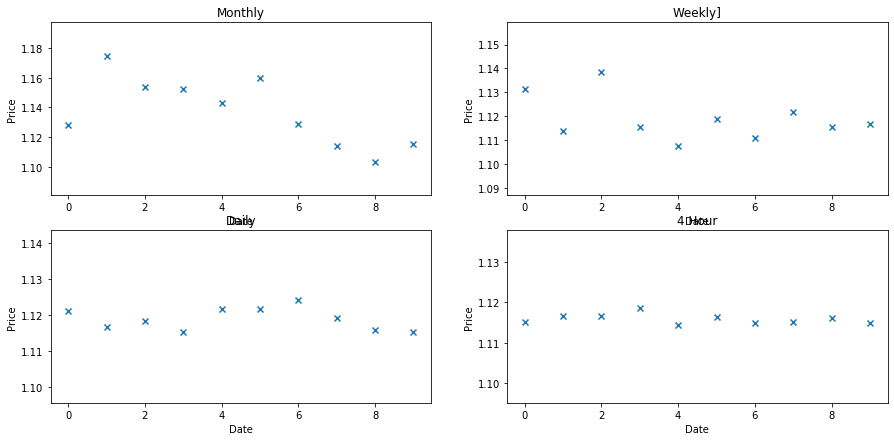

In [55]:
# fig, axs = plt.subplots(figsize=(15,7))
# axs.scatter(dfm.Date, dfm.Last)
fig, axs = plt.subplots(2, 2, figsize=(15,7))
axs[0, 0].scatter(dfm.index, dfm.Last, marker='x')
axs[0, 0].set_title('Monthly')
axs[0, 1].scatter(dfw.index, dfw.Last, marker='x')
axs[0, 1].set_title('Weekly]')
axs[1, 0].scatter(dfd.index, dfd.Last, marker='x')
axs[1, 0].set_title('Daily')
axs[1, 1].scatter(df4hr.index, df4hr.Last, marker='x')
axs[1, 1].set_title('4 Hour')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()